### Equipo: 

- Nombre de alumno 1: Nicolas Herrera
- Nombre de alumno 2: Lucas Carrasco

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/vspartamo/MDS7202)

### Indice

1. [Análisis Exploratorio de Datos](#Análisisexploratoriodedatos:)

# Análsis exploratorio de datos


Se realiza un análisis exploratorio de datos para identificar patrones, tendencias y relaciones en ellos. Esto para comprender mejor las características del conjunto de datos y guiar las siguientes decisiones en el pipeline de modelamiento.

In [1]:
#%pip install pyarrow pandas scikit-learn matplotlib seaborn

In [1]:
# Se importan las librerías básicas para trabajar los datos y visualizarlos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = "data/"
X_t0 = pd.read_parquet(DATA_PATH + "X_t0.parquet")
y_t0 = pd.read_parquet(DATA_PATH + "y_t0.parquet")

df_t0 = pd.concat([X_t0, y_t0], axis=1)
df_t0.head()

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0


In [4]:
df_t0.columns

Index(['borrow_block_number', 'borrow_timestamp', 'wallet_address',
       'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age',
       'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count',
       'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_am

Se entrega una breve descripción de cada una de las 78 columnas:
#### **Datos generales del wallet**
- **`borrow_block_number`**: Número del bloque en el que ocurrió el préstamo más reciente asociado al monedero.
- **`borrow_timestamp`**: Marca de tiempo (timestamp) del préstamo más reciente.
- **`wallet_address`**: Dirección del monedero que identifica al usuario.
- **`first_tx_timestamp`**: Timestamp de la primera transacción registrada para este monedero.
- **`last_tx_timestamp`**: Timestamp de la última transacción registrada.
- **`wallet_age`**: Tiempo total desde la primera transacción hasta la fecha actual, generalmente en días o meses.

#### **Estadísticas de transacciones**
- **`incoming_tx_count`**: Número total de transacciones entrantes al monedero.
- **`outgoing_tx_count`**: Número total de transacciones salientes desde el monedero.
- **`net_incoming_tx_count`**: Diferencia entre las transacciones entrantes y salientes.
- **`total_gas_paid_eth`**: Cantidad total de gas pagado en ETH por todas las transacciones.
- **`avg_gas_paid_per_tx_eth`**: Promedio de gas pagado por transacción, expresado en ETH.

#### **Datos sobre transacciones riesgosas**
- **`risky_tx_count`**: Número de transacciones clasificadas como riesgosas.
- **`risky_unique_contract_count`**: Número de contratos únicos involucrados en transacciones riesgosas.
- **`risky_first_tx_timestamp`**: Timestamp de la primera transacción riesgosa.
- **`risky_last_tx_timestamp`**: Timestamp de la última transacción riesgosa.
- **`risky_first_last_tx_timestamp_diff`**: Diferencia temporal entre la primera y la última transacción riesgosa.
- **`risky_sum_outgoing_amount_eth`**: Suma de ETH enviados en transacciones riesgosas.

#### **Estadísticas de ETH en el monedero**
- **`outgoing_tx_sum_eth`**: Suma total de ETH enviados en todas las transacciones salientes.
- **`incoming_tx_sum_eth`**: Suma total de ETH recibidos en todas las transacciones entrantes.
- **`outgoing_tx_avg_eth`**: Promedio de ETH enviados por transacción saliente.
- **`incoming_tx_avg_eth`**: Promedio de ETH recibidos por transacción entrante.
- **`max_eth_ever`**: Máximo balance de ETH alcanzado en el monedero.
- **`min_eth_ever`**: Mínimo balance de ETH registrado en el monedero.
- **`total_balance_eth`**: Balance actual del monedero en ETH.
- **`risk_factor`**: Indicador del nivel de riesgo asociado al monedero, basado en algún modelo de análisis.

#### **Estadísticas de préstamos y colaterales**
- **`total_collateral_eth`**: Suma total de ETH utilizados como colateral.
- **`total_collateral_avg_eth`**: Promedio de ETH usados como colateral por préstamo.
- **`total_available_borrows_eth`**: Monto total de ETH disponible para préstamo.
- **`total_available_borrows_avg_eth`**: Promedio de ETH disponibles para préstamo.
- **`avg_weighted_risk_factor`**: Factor de riesgo ponderado promedio.
- **`risk_factor_above_threshold_daily_count`**: Número de días en los que el factor de riesgo estuvo por encima de un umbral predefinido.
- **`avg_risk_factor`**: Promedio del factor de riesgo del monedero.
- **`max_risk_factor`**: Máximo valor del factor de riesgo registrado.
- **`borrow_amount_sum_eth`**: Suma total de ETH prestados.
- **`borrow_amount_avg_eth`**: Promedio de ETH prestados por transacción.
- **`borrow_count`**: Número total de transacciones de préstamo.
- **`repay_amount_sum_eth`**: Suma total de ETH devueltos.
- **`repay_amount_avg_eth`**: Promedio de ETH devueltos por transacción.
- **`repay_count`**: Número total de transacciones de devolución.
- **`borrow_repay_diff_eth`**: Diferencia entre ETH prestados y devueltos.

#### **Estadísticas de depósitos y retiros**
- **`deposit_count`**: Número de transacciones de depósito realizadas.
- **`deposit_amount_sum_eth`**: Suma total de ETH depositados.
- **`time_since_first_deposit`**: Tiempo transcurrido desde el primer depósito.
- **`withdraw_amount_sum_eth`**: Suma total de ETH retirados.
- **`withdraw_deposit_diff_if_positive_eth`**: Diferencia positiva entre ETH retirados y depositados.
- **`liquidation_count`**: Número de veces que el monedero fue liquidado.
- **`time_since_last_liquidated`**: Tiempo transcurrido desde la última liquidación.
- **`liquidation_amount_sum_eth`**: Suma total de ETH liquidados.

#### **Indicadores del mercado**
- **`market_adx`, `market_adxr`, `market_apo`, etc.**: Indicadores técnicos basados en análisis del mercado, como fuerza direccional (ADX), Momentum, osciladores (Aroon), volatilidad (ATR), fuerza relativa (CCI), entre otros. Estos se usan comúnmente para evaluar tendencias o comportamientos del mercado.

#### **Estadísticas adicionales**
- **`unique_borrow_protocol_count`**: Número de protocolos de préstamos únicos utilizados.
- **`unique_lending_protocol_count`**: Número de protocolos de préstamos ofrecidos.
- **`target`**: Variable objetivo, posiblemente para un modelo de predicción (como riesgo de impago o clasificación).

### **Limpieza de los datos**

Se remueve las columnas que corresponden a identificadores o no aportan información relevante **complementar o corregir esto**

In [5]:
columns_to_drop = [
    'borrow_block_number',
    'wallet_address',
    'borrow_timestamp',
    'first_tx_timestamp',
    'last_tx_timestamp',
    'risky_first_tx_timestamp',
    'risky_last_tx_timestamp',
    'unique_borrow_protocol_count',
    'unique_lending_protocol_count',
]

df_t0_columns_dropped = df_t0.drop(columns=columns_to_drop, inplace=False)

df_t0_columns_dropped.shape

(44296, 69)

In [6]:
sum(df_t0_columns_dropped.isna().sum() > 0)

0

In [7]:
df_t0_columns_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44296 entries, 0 to 44295
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   wallet_age                               44296 non-null  float64
 1   incoming_tx_count                        44296 non-null  int64  
 2   outgoing_tx_count                        44296 non-null  int64  
 3   net_incoming_tx_count                    44296 non-null  int64  
 4   total_gas_paid_eth                       44296 non-null  float64
 5   avg_gas_paid_per_tx_eth                  44296 non-null  float64
 6   risky_tx_count                           44296 non-null  int64  
 7   risky_unique_contract_count              44296 non-null  int64  
 8   risky_first_last_tx_timestamp_diff       44296 non-null  int64  
 9   risky_sum_outgoing_amount_eth            44296 non-null  float64
 10  outgoing_tx_sum_eth                      44296

In [8]:
numeric_features = df_t0_columns_dropped.select_dtypes(include=['int64', 'float64']).columns
train_numeric_features = numeric_features.drop('target')
categorical_features = df_t0_columns_dropped.select_dtypes(include=['object']).columns

In [9]:
print(df_t0_columns_dropped.describe())

         wallet_age  incoming_tx_count  outgoing_tx_count  \
count  4.429600e+04       44296.000000       44296.000000   
mean   2.943773e+07         999.369514        1360.256231   
std    2.897753e+07        3065.153260        3936.526950   
min    1.370000e+02           1.000000           0.000000   
25%    3.641601e+06          34.000000          52.000000   
50%    1.900256e+07         134.000000         207.000000   
75%    5.196818e+07         471.000000         678.000000   
max    1.540836e+08       98747.000000       71087.000000   

       net_incoming_tx_count  total_gas_paid_eth  avg_gas_paid_per_tx_eth  \
count           44296.000000        44296.000000             44296.000000   
mean             -360.886717            2.717345                 0.002874   
std              2167.545039           13.380028                 0.008137   
min            -68013.000000            0.000000                 0.000000   
25%              -198.000000            0.076647                 

Se estudia la relación de correlación entre los datos con el fin de quitar columnas en caso de que haya columnas con una correlación muy alta, y por lo tanto redundantes, o bien, existan variables con alta correlación a target.

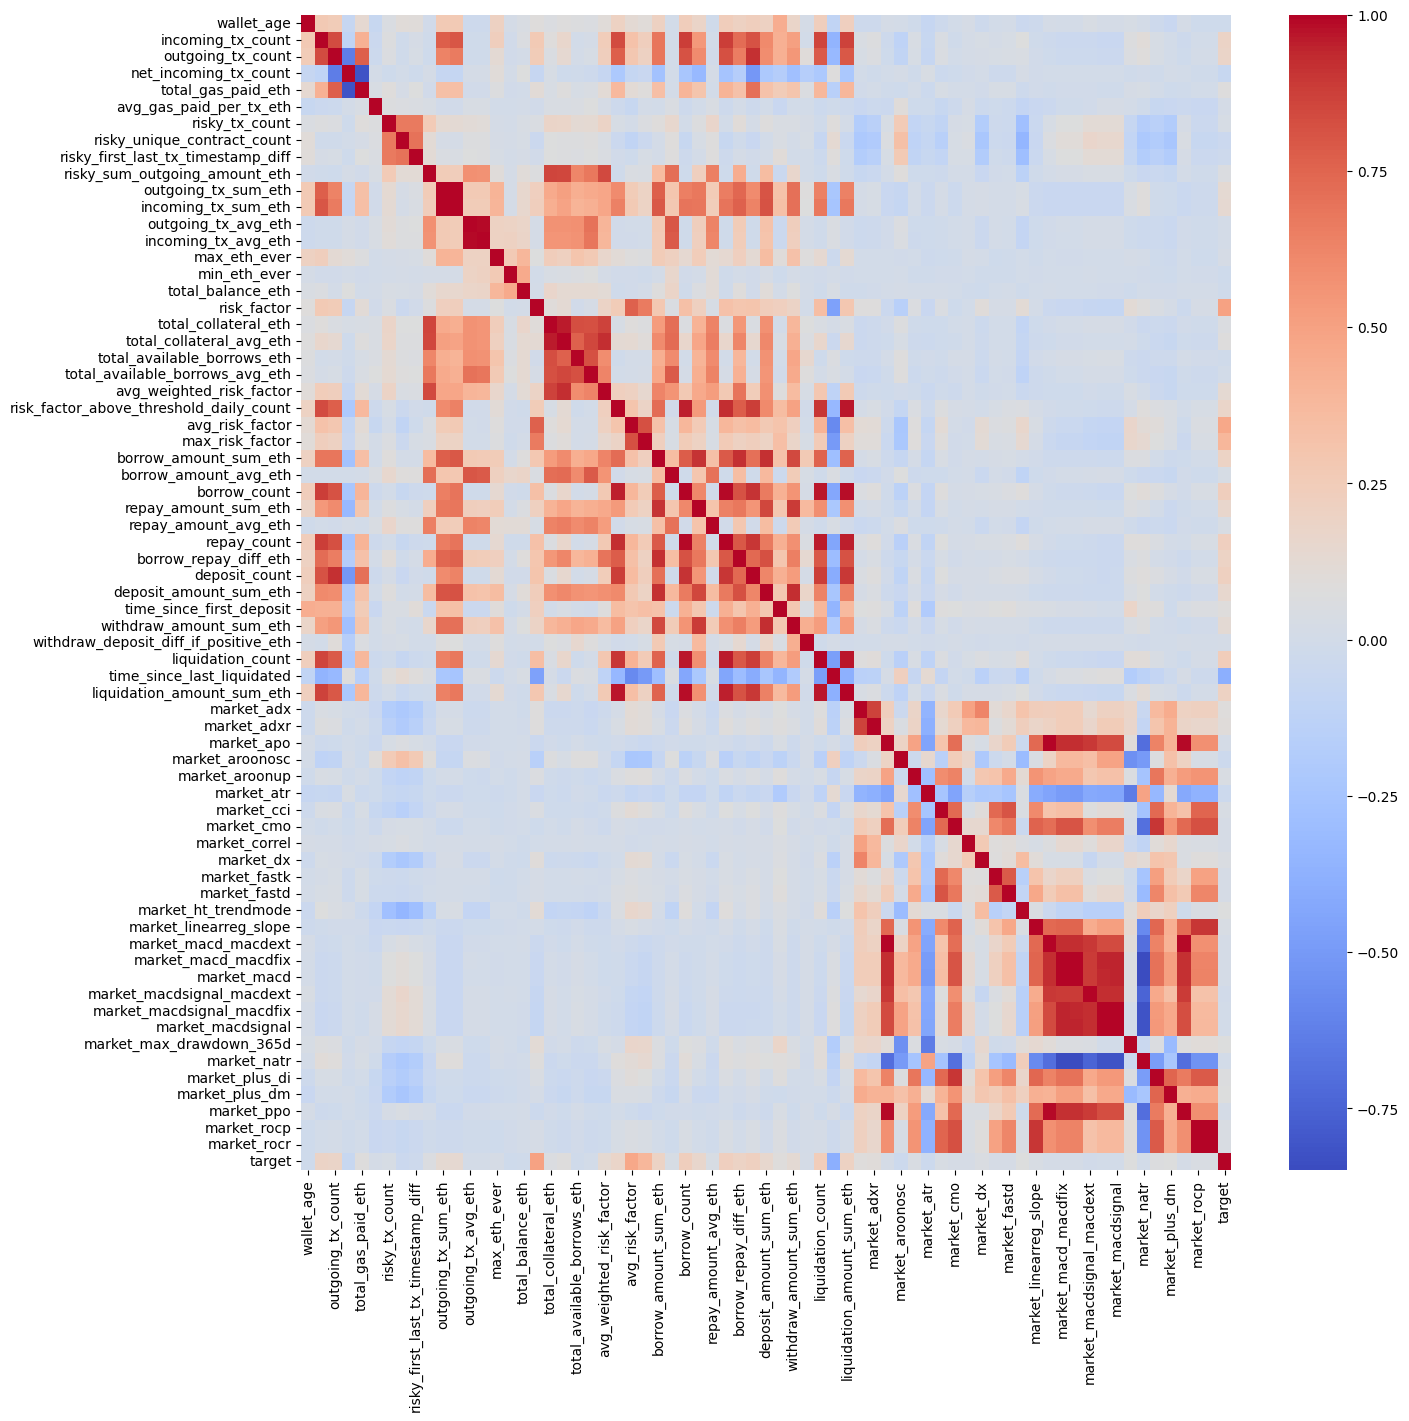

In [10]:
correlation_matrix = df_t0_columns_dropped[numeric_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [11]:
correlations = df_t0_columns_dropped.corr(numeric_only=True)['target'].dropna()
correlations_sorted = correlations.abs().sort_values(ascending=False)
top_correlated_variables = correlations_sorted.index[1:11]  
print("10 variables más correlacionadas con 'target':")
print(correlations[top_correlated_variables])


10 variables más correlacionadas con 'target':
risk_factor                   0.498964
avg_risk_factor               0.467638
max_risk_factor               0.391738
time_since_last_liquidated   -0.389695
liquidation_count             0.244964
borrow_count                  0.229686
repay_count                   0.226921
deposit_count                 0.213277
liquidation_amount_sum_eth    0.198720
borrow_repay_diff_eth         0.194440
Name: target, dtype: float64


In [12]:
def find_correlated_attributes(df, threshold=0.8): #una correlación de 0.8 es bastante alta, que es lo buscado
    corr_matrix = df.corr()
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append({
                    'Attribute 1': corr_matrix.columns[i],
                    'Attribute 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    correlated_df = pd.DataFrame(correlated_pairs)
    
    return correlated_df

In [13]:
correlated_attributes = find_correlated_attributes(df_t0_columns_dropped) # se usa un threshold de 0.8
correlated_attributes.head(50)

,Attribute 1,Attribute 2,Correlation
0,outgoing_tx_count,incoming_tx_count,0.836775
1,total_gas_paid_eth,net_incoming_tx_count,-0.812142
2,incoming_tx_sum_eth,outgoing_tx_sum_eth,0.998194
3,incoming_tx_avg_eth,outgoing_tx_avg_eth,0.992764
4,total_collateral_eth,risky_sum_outgoing_amount_eth,0.858686
5,total_collateral_avg_eth,risky_sum_outgoing_amount_eth,0.854890
6,total_collateral_avg_eth,total_collateral_eth,0.959850
7,total_available_borrows_eth,total_collateral_eth,0.826856
8,total_available_borrows_avg_eth,total_collateral_eth,0.822748
9,total_available_borrows_avg_eth,total_collateral_avg_eth,0.849873


In [14]:
X_t0

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,1.593110e+09,0xa821dee44fe91e79535762a466f6a09fc6727891,1.592795e+09,1.593110e+09,315154.0,50,53,-3,0.280005,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44292,10336621,1.593110e+09,0xc25c5e0495287cc3a380703b2b665da5964d35ea,1.589820e+09,1.593110e+09,3290294.0,536,606,-70,5.723699,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44293,10336624,1.593110e+09,0xa0f75491720835b36edc92d06ddc468d201e9b73,1.568312e+09,1.593110e+09,24797983.0,393,423,-30,2.343277,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44294,10336627,1.593110e+09,0x07582f51171839586e42a46d4f68c70a5eb72f93,1.561659e+09,1.593110e+09,31451728.0,45,49,-4,0.331227,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1


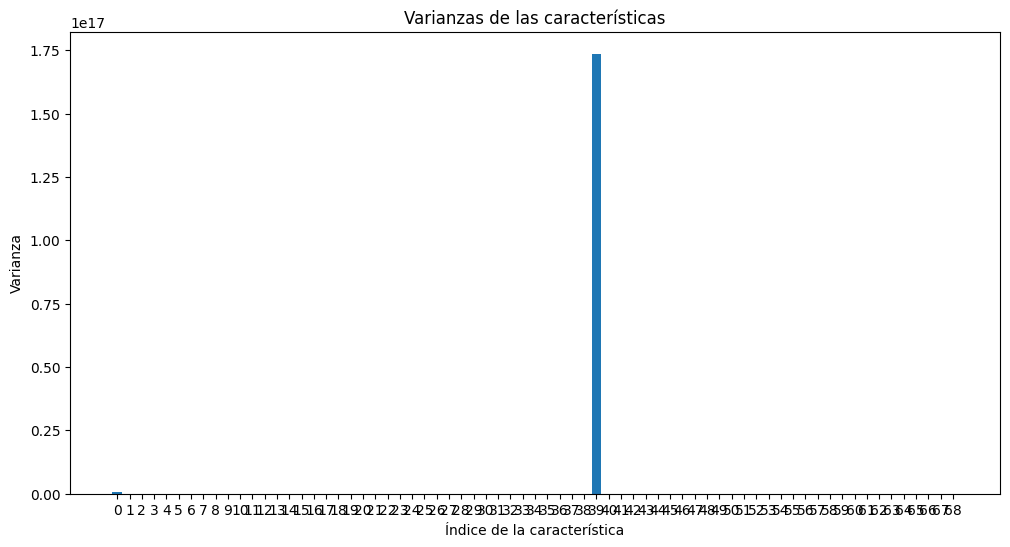

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#está raro este grafico, hace sentido?
X_t0 = df_t0_columns_dropped.values  

vars = np.var(X_t0, axis=0) 

# Gráfico de las varianzas
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(vars)), vars)
ax.set_title("Varianzas de las características")
ax.set_xlabel("Índice de la característica")
ax.set_ylabel("Varianza")
plt.xticks(range(len(vars))) 
plt.show()


Para visualizar la distribución de los datos, se realizará un histograma con estimaciones de densidas Kernel, cuyo objetivo es comparar las distribuciones de varias variables entre dos clases de la variable target.

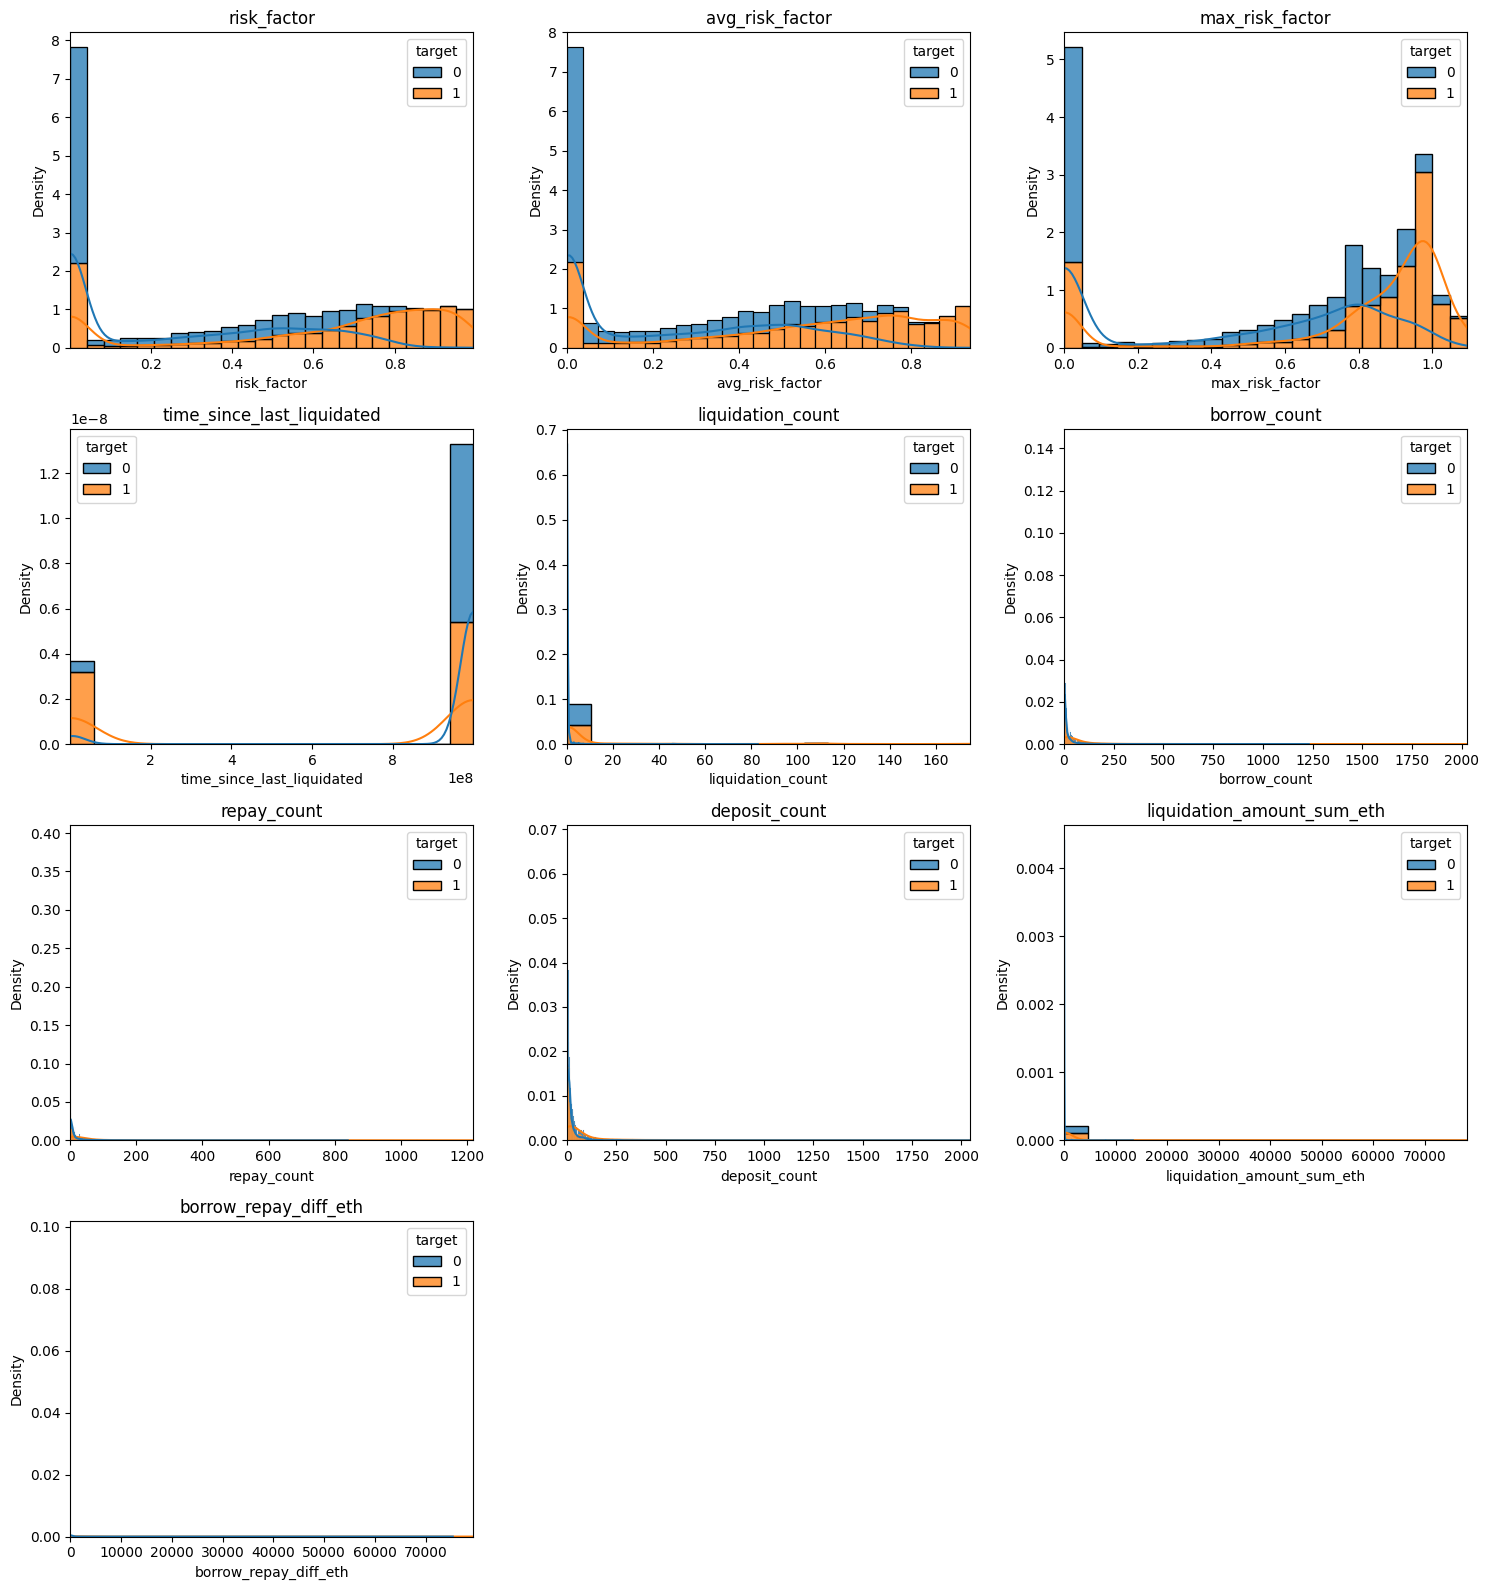

In [16]:
def plot_distributions_grid_stacked(df, max_plots_per_row=3, hue=None, normalize=False, clip_percentiles=(1, 99)):
    """
    Plots a grid of histograms with stacked bars and overlaid KDE lines for each column in a DataFrame.
    Each plot has its own scale for both X and Y axes.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the data to plot.
    - max_plots_per_row (int): Maximum number of plots per row.
    - hue (str): Column name to use for coloring the plots (optional).
    - normalize (bool): Whether to normalize histograms for comparison.
    - clip_percentiles (tuple): Percentiles to clip the data for better visualization.
    """
    # Calculate the grid dimensions
    num_columns = len(df.columns)
    if hue in df.columns:
        num_columns -= 1  # Exclude hue column from plotting
    
    num_rows = int(np.ceil(num_columns / max_plots_per_row))
    
    fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(5 * max_plots_per_row, 4 * num_rows))
    axes = axes.flatten()  # Flatten to make indexing easier
    
    columns_to_plot = [col for col in df.columns if col != hue]
    
    # Plot each column
    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        # Clip data to remove outliers
        lower, upper = np.percentile(df[column], clip_percentiles)
        clipped_data = df[(df[column] >= lower) & (df[column] <= upper)]
        
        if hue and hue in df.columns:
            # Plot stacked histogram
            sns.histplot(data=clipped_data, x=column, hue=hue, kde=False, 
                         stat='density' if normalize else 'count', ax=ax, element="bars", multiple="stack")
            # Add overlaid KDE lines
            sns.kdeplot(data=clipped_data, x=column, hue=hue, ax=ax, common_norm=normalize, legend=False)
        else:
            sns.histplot(clipped_data[column], kde=True, stat='density' if normalize else 'count', ax=ax)
        
        ax.set_title(column)
        ax.set_xlim(lower, upper)  # Set x-axis limits to clipped range
    
    # Remove unused subplots
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

to_plot_cols = top_correlated_variables.tolist() + ['target']
plot_distributions_grid_stacked(df_t0_columns_dropped[to_plot_cols], max_plots_per_row=3, hue='target', normalize=True)

Ahora, se estudia la distribución del conjunto de datos "X_t1", que son los datos sobre los que se hará predicciones para la primera entrega.

In [17]:
X_t1_iter_1 = pd.read_parquet(DATA_PATH + "X_t1_old.parquet")

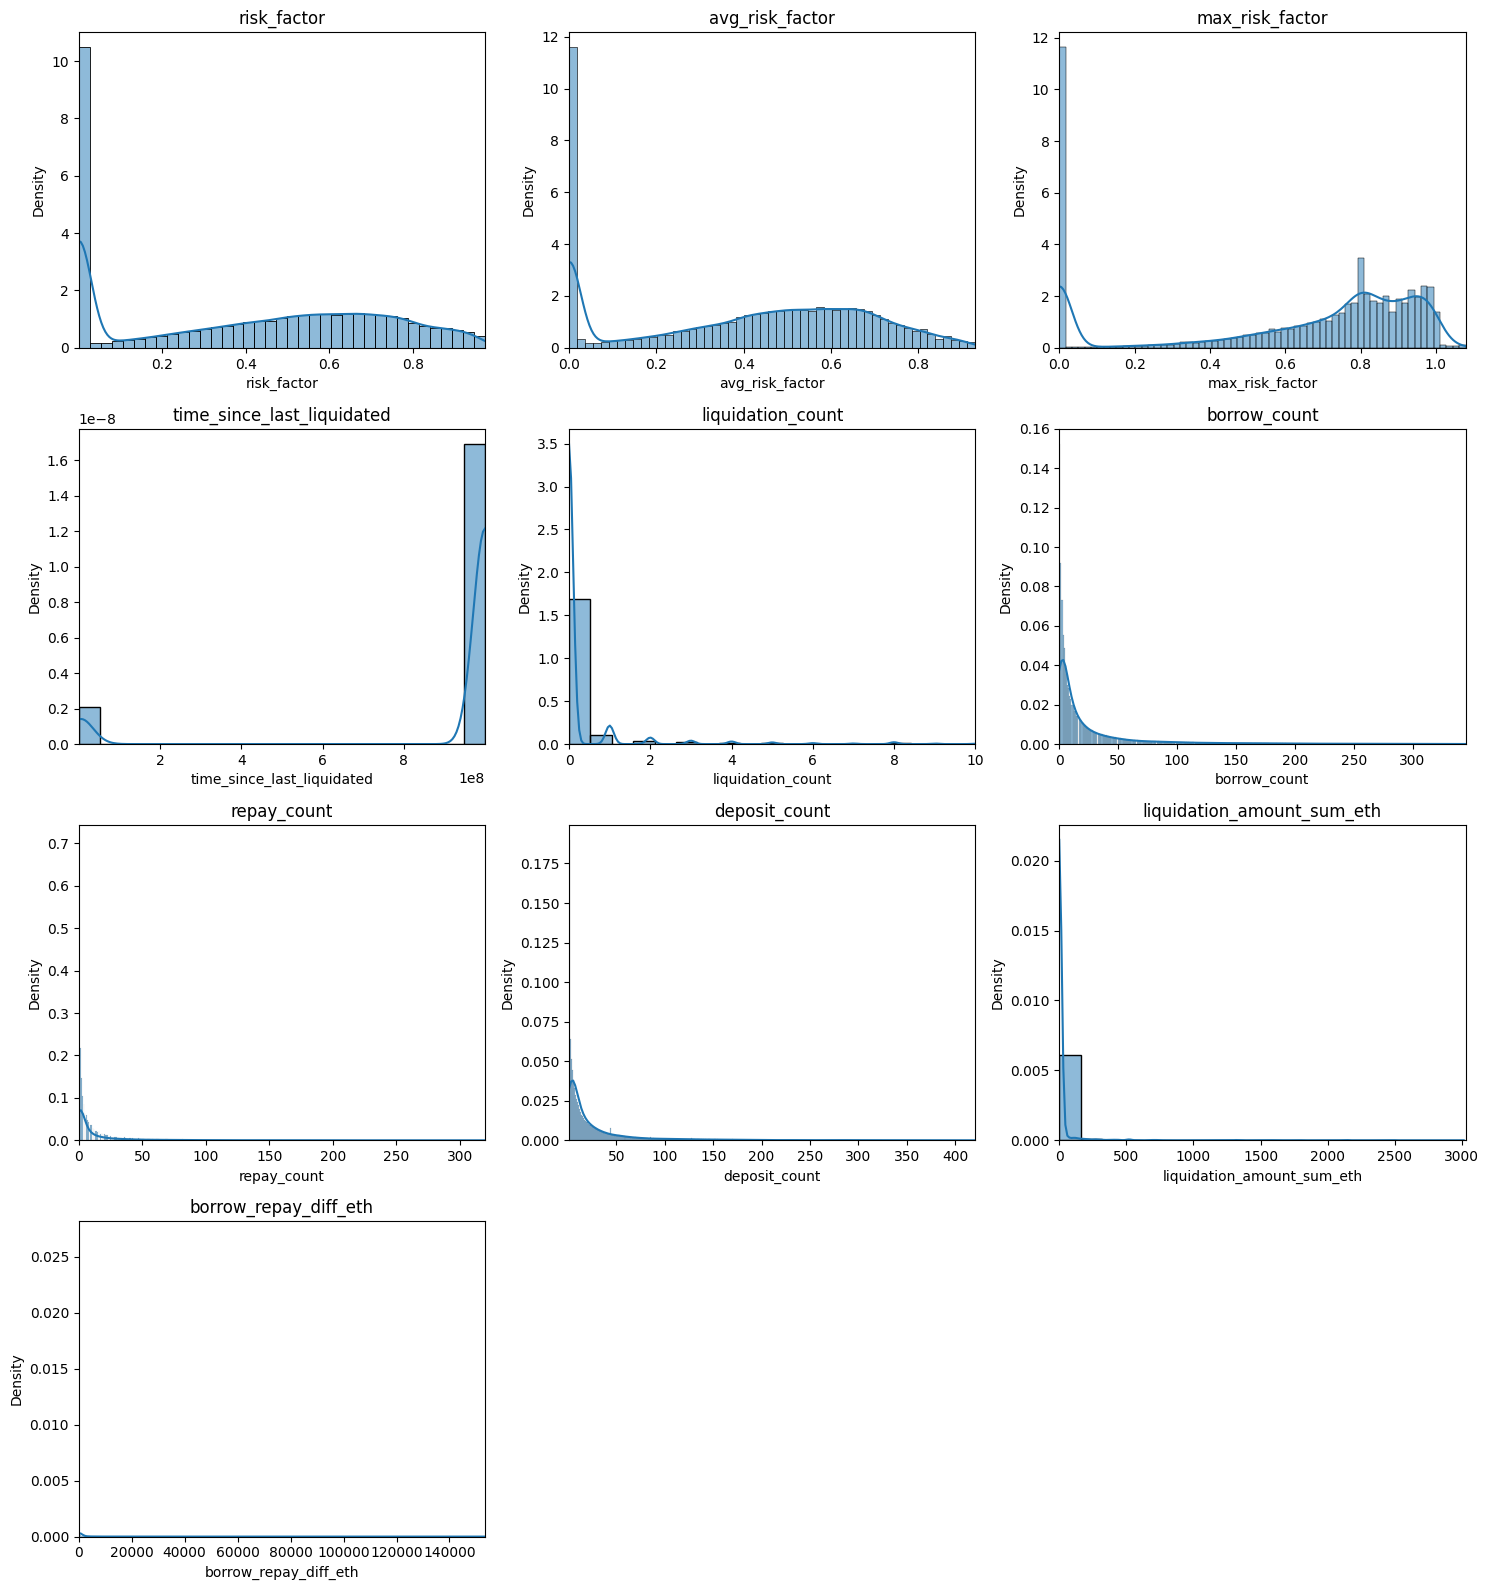

In [18]:
to_plot_cols_X_t1_iter_1 = top_correlated_variables.tolist()
plot_distributions_grid_stacked(X_t1_iter_1[to_plot_cols_X_t1_iter_1], max_plots_per_row=3, hue='target', normalize=True)

In [19]:
X_t1_iter_2 = pd.read_parquet(DATA_PATH + "X_t1_new.parquet")

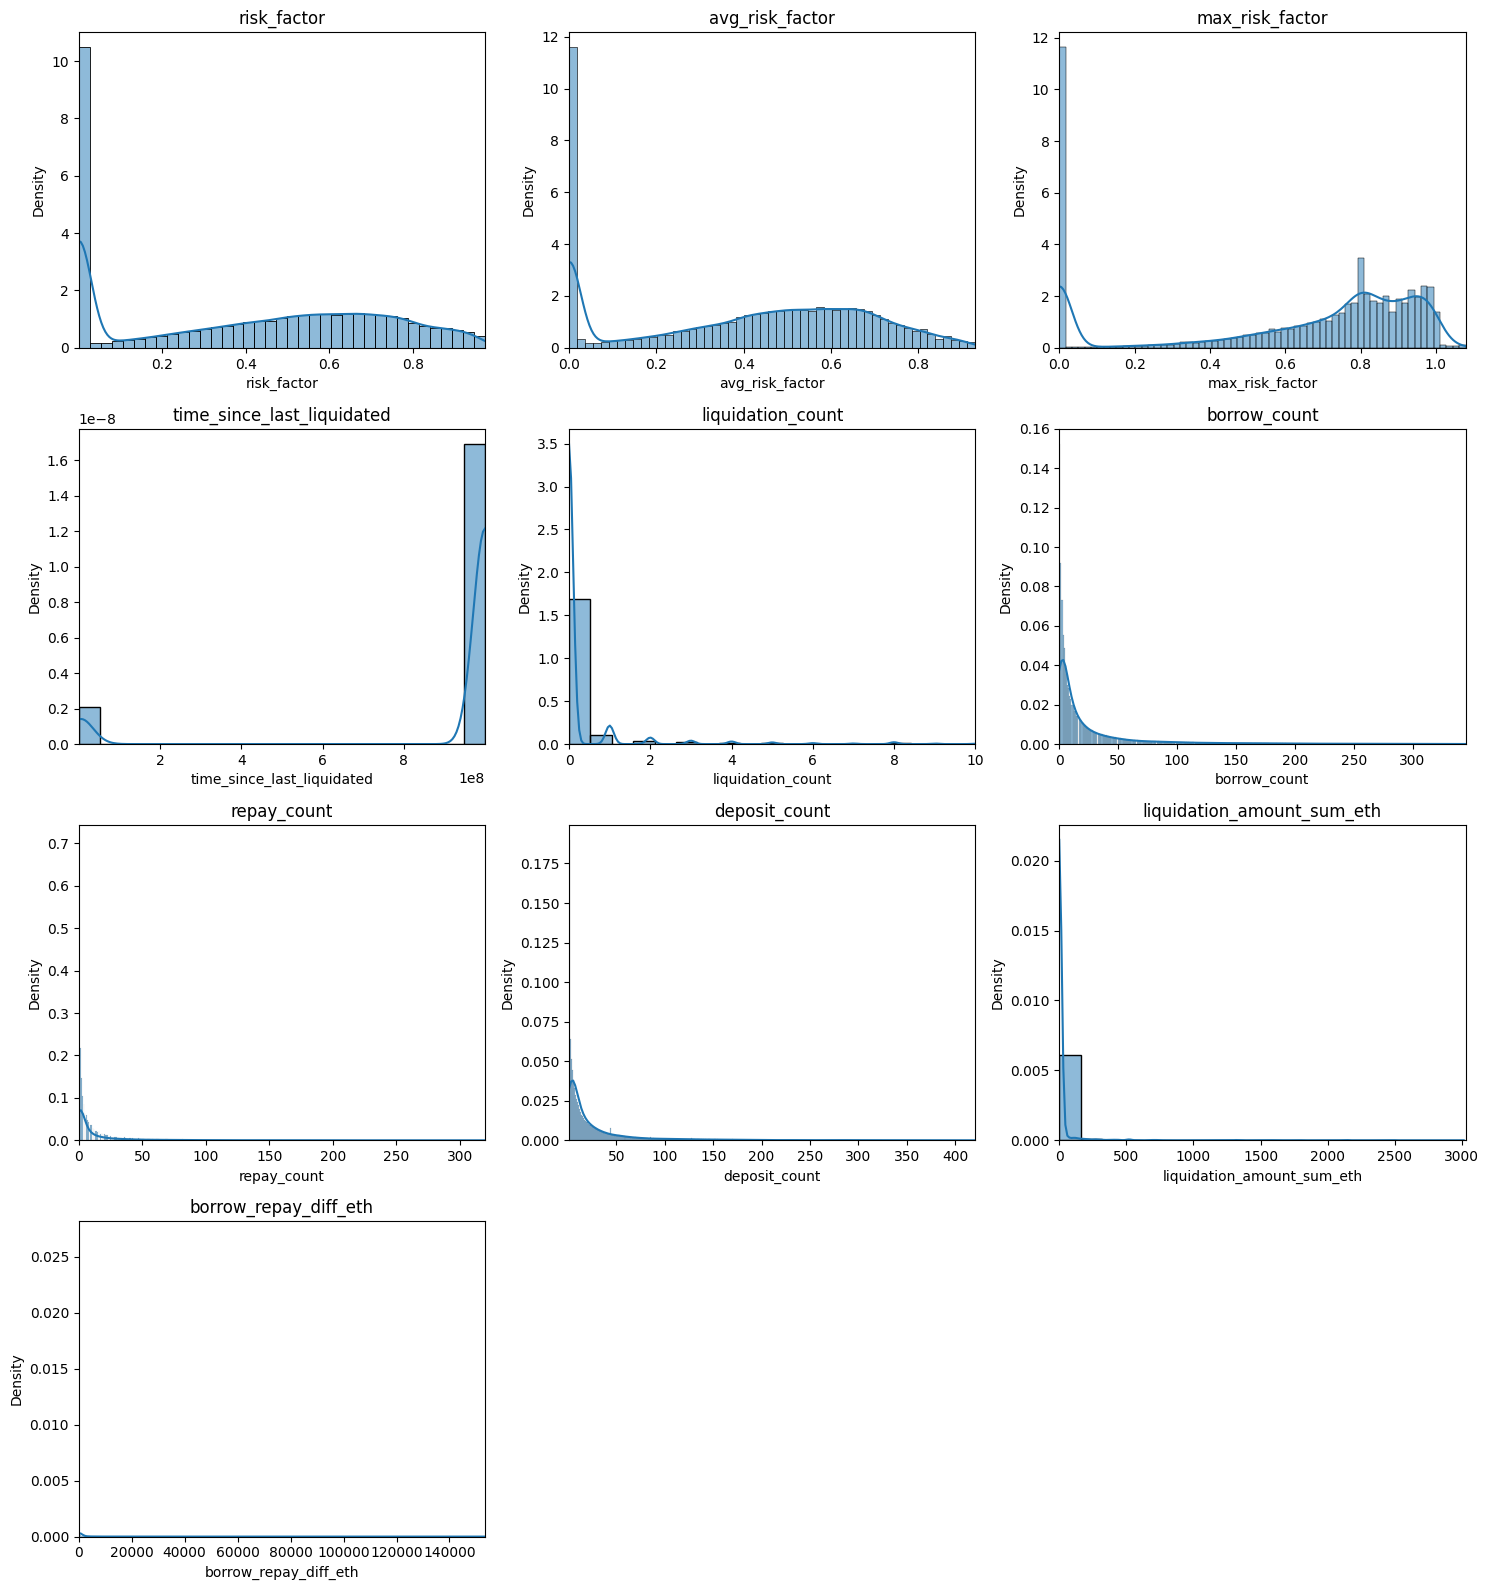

In [20]:
to_plot_cols_X_t1_iter_1 = top_correlated_variables.tolist()
plot_distributions_grid_stacked(X_t1_iter_1[to_plot_cols_X_t1_iter_1], max_plots_per_row=3, hue='target', normalize=True)

## **Entrenamiento de modelos de ML**

Luego de un primer acercamiento a los datos, se procede a realizar un preprocesamiento de estos:
   - Estandarización de filas y/o columnas.  
   - Reducción de dimensionalidad.  
   - Discretización de variables numéricas a categóricas.  
   - Manejo de datos nulos.  
   - Otras transformaciones relevantes según los datos disponibles.  


**Eso es lo recomendado, no estoy seguro si lo hicimos todo o aún no**


#### **División de los datos**

#### **Preparación de pipelines**

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Pipeline para características numéricas con PCA
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),   # Hay que ver si distributen normal o es mejor otro scaler
#    ('pca', PCA(n_components=50))  # Reduce a 50 componentes principales
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.drop('target')),  # Numéricas con PCA
        ('cat', categorical_transformer, categorical_features)  # Categóricas con OneHot
    ]
)


In [22]:
from sklearn.model_selection import train_test_split

X = df_t0_columns_dropped.drop(columns='target')
y = df_t0_columns_dropped['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, stratify=y_t0, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, stratify=y_temp, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((31007, 68), (6644, 68), (6645, 68))

In [23]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()
y_test = np.array(y_test).ravel()

## Baseline
Se implementa un baseline, para ello se elige Decision Tree como modelo y se crea una función que englobe los Pipelines y retorne métricas de interés. En lo siguiente, consideraremos como métrica objetivo la **INSERTAR MÉTRICA** (DE MOMENTO CONSIDERO EL AUC, PUEDE SER OTRA)

#### **Decision Tree Classifier**

In [44]:
import os
import pickle
from typing import Callable, List, Union
import mlflow
import optuna
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


def create_preprocessor(
    numeric_features: Union[pd.Index, List[str]],
    categorical_features: Union[pd.Index, List[str]],
    scaler=None,
    use_pca=False,
    pca_components=50,
):
    if scaler is None:
        scaler = StandardScaler()

    # Define numeric transformer
    numeric_transformer_steps = [("scaler", scaler)]
    if use_pca:
        numeric_transformer_steps.append(("pca", PCA(n_components=pca_components)))
    numeric_transformer = Pipeline(steps=numeric_transformer_steps)

    # Define categorical transformer
    categorical_transformer = Pipeline(
        steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
    )

    # Combine preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    return preprocessor


def create_pipeline(
    model: BaseEstimator,
    preprocessor: ColumnTransformer,
):
    return Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])


def optimize_hyperparameters(
    model: BaseEstimator,
    X_train: pd.DataFrame,
    y_train: Union[pd.Series, np.ndarray],
    get_optuna_params: Callable,
    experiment_name: str,
    n_trials: int = 50,
    direction: str = "maximize",
):
    def objective(trial: optuna.Trial):
        run_name = f"trial_{trial.number}_optimization"
        with mlflow.start_run(run_name=run_name, nested=True):
            optuna_params = get_optuna_params(trial)
            model.set_params(**optuna_params)
            mlflow.log_params(optuna_params)
            
            model.fit(X_train, y_train)

            # Optimizamos sobre el AUC ROC
            y_proba_pred = model.predict_proba(X_train)[:, 1]
            roc_auc = roc_auc_score(y_train, y_proba_pred)
            mlflow.log_metric("roc_auc", roc_auc)
            
            return roc_auc

    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name="optuna_study"):
        study = optuna.create_study(direction=direction)
        study.optimize(objective, n_trials=n_trials)
        mlflow.end_run()

    # Log best parameters in a separate run
    with mlflow.start_run(run_name="best_params", nested=False):
        mlflow.log_params(study.best_params)

    return study.best_params


def evaluate_model(y_true, y_pred, y_pred_proba=None):
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average="binary"),
        "recall": recall_score(y_true, y_pred, average="binary"),
        "f1_score": f1_score(y_true, y_pred, average="binary"),
        "roc_auc": (
            roc_auc_score(y_true, y_pred_proba) if y_pred_proba is not None else None
        ),
    }
    print(f"Métricas del modelo:")
    for k, v in metrics.items():
        print(f"    {k}: {v}")
    print(f"Confusion matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"Classification report:\n{classification_report(y_true, y_pred)}")
    return metrics


def log_metrics(metrics: dict, prefix: str):
    mlflow.log_metrics({f"{prefix}_{k}": v for k, v in metrics.items()})


def save_model(pipeline: Pipeline, save_model_path: str):
    with open(save_model_path, "wb") as f:
        pickle.dump(pipeline, f)


def train_model(
    model: BaseEstimator,
    X_train: pd.DataFrame,
    y_train: Union[pd.Series, np.ndarray],
    X_val: pd.DataFrame,
    y_val: Union[pd.Series, np.ndarray],
    numeric_features: Union[pd.Index, List[str]],
    categorical_features: Union[pd.Index, List[str]],
    experiment_name: str,
    save_model_path: str = None,
    scaler=None,
    use_pca=False,
    pca_components=50,
    optimize: bool = False,
    get_optuna_params: Callable = None,
    n_trials: int = 50,
):
    mlflow.set_experiment(experiment_name)

    # Create preprocessor
    preprocessor = create_preprocessor(
        numeric_features, categorical_features, scaler, use_pca, pca_components
    )

    # Optimize hyperparameters if required
    if optimize and get_optuna_params:
        best_params = optimize_hyperparameters(
            model, X_train, y_train, get_optuna_params, experiment_name, n_trials
        )
        mlflow.end_run()
        model.set_params(**best_params)

    # Create pipeline
    pipeline = create_pipeline(model, preprocessor)

    # Train the pipeline
    with mlflow.start_run(run_name="best_params_training"):
        pipeline.fit(X_train, y_train)

        # Log metrics
        y_train_pred = pipeline.predict(X_train)
        y_val_pred = pipeline.predict(X_val)

        if hasattr(model, "predict_proba"):
            y_train_proba_pred = pipeline.predict_proba(X_train)[:, 1]
            y_val_proba_pred = pipeline.predict_proba(X_val)[:, 1]
        else:
            y_train_proba_pred = None
            y_val_proba_pred = None

        print("Evaluación del modelo en el conjunto de entrenamiento:")
        train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba_pred)
        print("Evaluación del modelo en el conjunto de validación:")
        val_metrics = evaluate_model(y_val, y_val_pred, y_val_proba_pred)

        log_metrics(train_metrics, "train")
        log_metrics(val_metrics, "val")

        if save_model_path:
            # Save model and preprocessor
            save_model(pipeline, save_model_path)

    return pipeline


def retrain_model(
    pipeline_or_path: Union[str, Pipeline],
    X: pd.DataFrame,
    y: Union[pd.Series, np.ndarray],
    fun_to_update_model: Callable,
    save_model_path: str,
    test_size: float = 0.2,
    random_state: int = 42,
    optimize: bool = False,
    get_optuna_params: Callable = None,
    n_trials: int = 50,
):
    if isinstance(pipeline_or_path, str):
        with open(pipeline_or_path, "rb") as f:
            pipeline = pickle.load(f)
    else:
        pipeline = pipeline_or_path

    preprocessor = pipeline.named_steps["preprocessor"]
    model: BaseEstimator = pipeline.named_steps["classifier"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    X_train_transformed = preprocessor.transform(X_train)

    if optimize and get_optuna_params:
        best_params = optimize_hyperparameters(
            model,
            X_train_transformed,
            y_train,
            get_optuna_params,
            "retraining_optimization",
            n_trials,
        )
        model.set_params(**best_params)

    model = fun_to_update_model(model, X_train_transformed, y_train)

    pipeline = create_pipeline(model, preprocessor)
    save_model(pipeline, save_model_path)

    X_test_transformed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = (
        model.predict_proba(X_test_transformed)[:, 1]
        if hasattr(model, "predict_proba")
        else None
    )

    print("Evaluación en el conjunto de prueba:")
    evaluate_model(y_test, y_pred, y_pred_proba)

    return pipeline

In [26]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_pipe, _ = train_model(
    model=DecisionTreeClassifier(),
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    experiment_name="Basic Decision Tree",
    categorical_features=categorical_features,
    numeric_features=train_numeric_features,
    optimize=True,
    optuna_params=lambda trial: {
        "max_depth": trial.suggest_int("max_depth", 1, 32),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 32),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 32),
    },
    n_trials=15,
)


# Todo lo comentado se borrará en la próxima iteración, de momento lo dejo por si hace falta después


# get the tree
# tree = decision_tree_pipe.named_steps['classifier']
## get the feature importances
# importances = tree.feature_importances_
## get the feature names
# feature_names = X_train.columns
# sort them
# indices = np.argsort(importances)[::-1]#

## plot the feature importances
##plt.figure(figsize=(12, 6))
##plt.title("Feature importances")
##preprocessed_X_train = decision_tree_pipe.named_steps['preprocessor'].transform(X_train)
##plt.bar(range(preprocessed_X_train.shape[1]), importances[indices],
##        align="center")
##
# plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
# plt.xlim([-1, preprocessed_X_train.shape[1]])
# plt.show()

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

Evaluación del modelo en el conjunto de entrenamiento:
Métricas del modelo:
    accuracy: 0.9904537685038862
    precision: 0.9982711148107831
    recall: 0.9830380225739328
    f1_score: 0.9905960096581522
    roc_auc: 0.9993921858046866
Confusion matrix:
[[15121    27]
 [  269 15590]]
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15148
           1       1.00      0.98      0.99     15859

    accuracy                           0.99     31007
   macro avg       0.99      0.99      0.99     31007
weighted avg       0.99      0.99      0.99     31007

Evaluación del modelo en el conjunto de validación:
Métricas del modelo:
    accuracy: 0.8284166164960867
    precision: 0.8320588235294117
    recall: 0.8325485579752796
    f1_score: 0.8323036187113857
    roc_auc: 0.8305829477453485
Confusion matrix:
[[2675  571]
 [ 569 2829]]
Classification report:
              precision    recall  f1-score   support

   

## Modelos de ML

Hecho el baseline, se implementará Random Forest, XGBoost, CatBoost y luego se utilizará Pycaret para explorar otros modelos que considere la librería.

##### **Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest_pipe, _ = train_model(
    model=RandomForestClassifier(),
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    experiment_name="Basic Random Forest",
    numeric_features=train_numeric_features,
    categorical_features=categorical_features,
)


# get the tree
# tree = random_forest_pipe.named_steps['classifier']
## get the feature importances
# importances = tree.feature_importances_
## get the feature names
# feature_names = X_train.columns
## sort them
# indices = np.argsort(importances)[::-1]
#
## plot the feature importances
# plt.figure(figsize=(12, 6))
# plt.title("Feature importances")
# preprocessed_X_train = random_forest_pipe.named_steps['preprocessor'].transform(X_train)
# plt.bar(range(preprocessed_X_train.shape[1]), importances[indices],
#        align="center")
#
# plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
# plt.xlim([-1, preprocessed_X_train.shape[1]])
# plt.show()

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

Evaluación del modelo en el conjunto de entrenamiento:
Métricas del modelo:
    accuracy: 1.0
    precision: 1.0
    recall: 1.0
    f1_score: 1.0
    roc_auc: 1.0
Confusion matrix:
[[15148     0]
 [    0 15859]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15148
           1       1.00      1.00      1.00     15859

    accuracy                           1.00     31007
   macro avg       1.00      1.00      1.00     31007
weighted avg       1.00      1.00      1.00     31007

Evaluación del modelo en el conjunto de validación:
Métricas del modelo:
    accuracy: 0.8944912703190849
    precision: 0.9342995169082126
    recall: 0.853737492642731
    f1_score: 0.892203598339228
    roc_auc: 0.9591046452971322
Confusion matrix:
[[3042  204]
 [ 497 2901]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3246
           1       0.93   

#### **XGBoost**

In [28]:
from xgboost import XGBClassifier

# Entrenar el modelo con XGBoost
xgboost_pipe, _ = train_model(
    model=XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    experiment_name="Basic XGBoost",
    numeric_features=train_numeric_features,
    categorical_features=categorical_features,
)

## Obtener el modelo entrenado
# xgb_model = xgboost_pipe.named_steps['classifier']
#
## Obtener importancias de características
# importances = xgb_model.feature_importances_
# feature_names = X_train.columns
# indices = np.argsort(importances)[::-1]
#
## Graficar la importancia de las características
# plt.figure(figsize=(12, 6))
# plt.title("Feature Importances (XGBoost)")
# preprocessed_X_train = xgboost_pipe.named_steps['preprocessor'].transform(X_train)
# plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
# plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
# plt.xlim([-1, preprocessed_X_train.shape[1]])
# plt.show()

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

Evaluación del modelo en el conjunto de entrenamiento:
Métricas del modelo:
    accuracy: 0.9512368174928242
    precision: 0.9786481617401748
    recall: 0.9248376316287281
    f1_score: 0.9509822991635869
    roc_auc: 0.9916981588457949
Confusion matrix:
[[14828   320]
 [ 1192 14667]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     15148
           1       0.98      0.92      0.95     15859

    accuracy                           0.95     31007
   macro avg       0.95      0.95      0.95     31007
weighted avg       0.95      0.95      0.95     31007

Evaluación del modelo en el conjunto de validación:
Métricas del modelo:
    accuracy: 0.885009030704395
    precision: 0.9146725440806045
    recall: 0.8549146556798116
    f1_score: 0.8837846060237299
    roc_auc: 0.9515175013245804
Confusion matrix:
[[2975  271]
 [ 493 2905]]
Classification report:
              precision    recall  f1-score   support

    

#### **LGBMoost**

In [29]:
from lightgbm import LGBMClassifier

# Entrenar el modelo con LightGBM
lightgbm_pipe, _ = train_model(
    model=LGBMClassifier(),
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    experiment_name="Basic LightGBM",
    numeric_features=train_numeric_features,
    categorical_features=categorical_features,
)

## Obtener el modelo entrenado
# lgb_model = lightgbm_pipe.named_steps['classifier']
#
## Obtener importancias de características
# importances = lgb_model.feature_importances_
# feature_names = X_train.columns
# indices = np.argsort(importances)[::-1]
#
# plt.figure(figsize=(12, 6))
# plt.title("Feature Importances (LightGBM)")
# preprocessed_X_train = lightgbm_pipe.named_steps['preprocessor'].transform(X_train)
# plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
# plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
# plt.xlim([-1, preprocessed_X_train.shape[1]])
# plt.show()

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

[LightGBM] [Info] Number of positive: 15859, number of negative: 15148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15502
[LightGBM] [Info] Number of data points in the train set: 31007, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511465 -> initscore=0.045869
[LightGBM] [Info] Start training from score 0.045869
Evaluación del modelo en el conjunto de entrenamiento:
Métricas del modelo:
    accuracy: 0.8817363821072661
    precision: 0.9371145848271906
    recall: 0.824074657922946
    f1_score: 0.8769669518537159
    roc_auc: 0.9576119359420247
Confusion matrix:
[[14271   877]
 [ 2790 13069]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15148
           1       0.94      0.82      0.88     15859

    accuracy                     

#### **CatBoost**

In [34]:
from catboost import CatBoostClassifier

catboost_pipe, _ = train_model(
    model=CatBoostClassifier(verbose=0),
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    experiment_name="Basic CatBoost",
    numeric_features=train_numeric_features,
    categorical_features=categorical_features,
)

# cat_model = catboost_pipe.named_steps['classifier']
#
# importances = cat_model.feature_importances_
# feature_names = X_train.columns
# indices = np.argsort(importances)[::-1]
#
# plt.figure(figsize=(12, 6))
# plt.title("Feature Importances (CatBoost)")
# preprocessed_X_train = catboost_pipe.named_steps['preprocessor'].transform(X_train)
# plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
# plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
# plt.xlim([-1, preprocessed_X_train.shape[1]])
# plt.show()

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

Evaluación del modelo en el conjunto de entrenamiento:
Métricas del modelo:
    accuracy: 0.9241461605443932
    precision: 0.9605810543544977
    recall: 0.8881392269373857
    f1_score: 0.9229408295655592
    roc_auc: 0.9806828713487834
Confusion matrix:
[[14570   578]
 [ 1774 14085]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     15148
           1       0.96      0.89      0.92     15859

    accuracy                           0.92     31007
   macro avg       0.93      0.92      0.92     31007
weighted avg       0.93      0.92      0.92     31007

Evaluación del modelo en el conjunto de validación:
Métricas del modelo:
    accuracy: 0.8782360024081879
    precision: 0.9163718237375362
    recall: 0.8384343731606827
    f1_score: 0.875672352850776
    roc_auc: 0.9463843669412293
Confusion matrix:
[[2986  260]
 [ 549 2849]]
Classification report:
              precision    recall  f1-score   support

    

In [35]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

def forward_feature_selection(X, y, model, scoring='accuracy', cv=5):
    selected_features = []
    remaining_features = list(X.columns)
    best_score = -np.inf

    while remaining_features:
        scores = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[current_features]
            score = cross_val_score(model, X_subset, y, scoring=scoring, cv=cv).mean()
            scores.append((score, feature))
        
        scores.sort(reverse=True, key=lambda x: x[0])
        best_current_score, best_feature = scores[0]

        if best_current_score > best_score:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_score = best_current_score
            print(f"Feature added: {best_feature}, New score: {best_current_score}")
        else:
            break

    return selected_features

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)

selected_features = forward_feature_selection(X_train, y_train, lgb_model, scoring='accuracy', cv=5)

print("\nCaracterísticas seleccionadas:")
print(selected_features)


Feature added: max_risk_factor, New score: 0.7478632270616598
Feature added: max_eth_ever, New score: 0.7909504770870246
Feature added: risk_factor, New score: 0.8071081210908291
Feature added: min_eth_ever, New score: 0.8176219874034943
Feature added: market_aroonosc, New score: 0.826845500000234
Feature added: wallet_age, New score: 0.8319412286489248
Feature added: outgoing_tx_sum_eth, New score: 0.8361984504792973
Feature added: market_max_drawdown_365d, New score: 0.8388428991776664
Feature added: incoming_tx_avg_eth, New score: 0.8411327848058543
Feature added: total_available_borrows_avg_eth, New score: 0.843132217858569
Feature added: net_incoming_tx_count, New score: 0.8432289764458936
Feature added: market_ppo, New score: 0.8451962710449017
Feature added: withdraw_amount_sum_eth, New score: 0.8455188412724934


KeyboardInterrupt: 

**Interpretabilidad del modelo con mejores resultados**  
De lo anterior, el modelo con mejores resultados es Extra Trees Classifier en AUC, veamos la interpretabilidad del modelo para comprender en base a qué toma decisiones el modelo y así justificar sus resultados.

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

Evaluación del modelo en el conjunto de entrenamiento:
Métricas del modelo:
    accuracy: 1.0
    precision: 1.0
    recall: 1.0
    f1_score: 1.0
    roc_auc: 1.0
Confusion matrix:
[[15148     0]
 [    0 15859]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15148
           1       1.00      1.00      1.00     15859

    accuracy                           1.00     31007
   macro avg       1.00      1.00      1.00     31007
weighted avg       1.00      1.00      1.00     31007

Evaluación del modelo en el conjunto de validación:
Métricas del modelo:
    accuracy: 0.8836544250451536
    precision: 0.9120879120879121
    recall: 0.8549146556798116
    f1_score: 0.882576332978885
    roc_auc: 0.9473881377795715
Confusion matrix:
[[2966  280]
 [ 493 2905]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3246
           1       0.91  

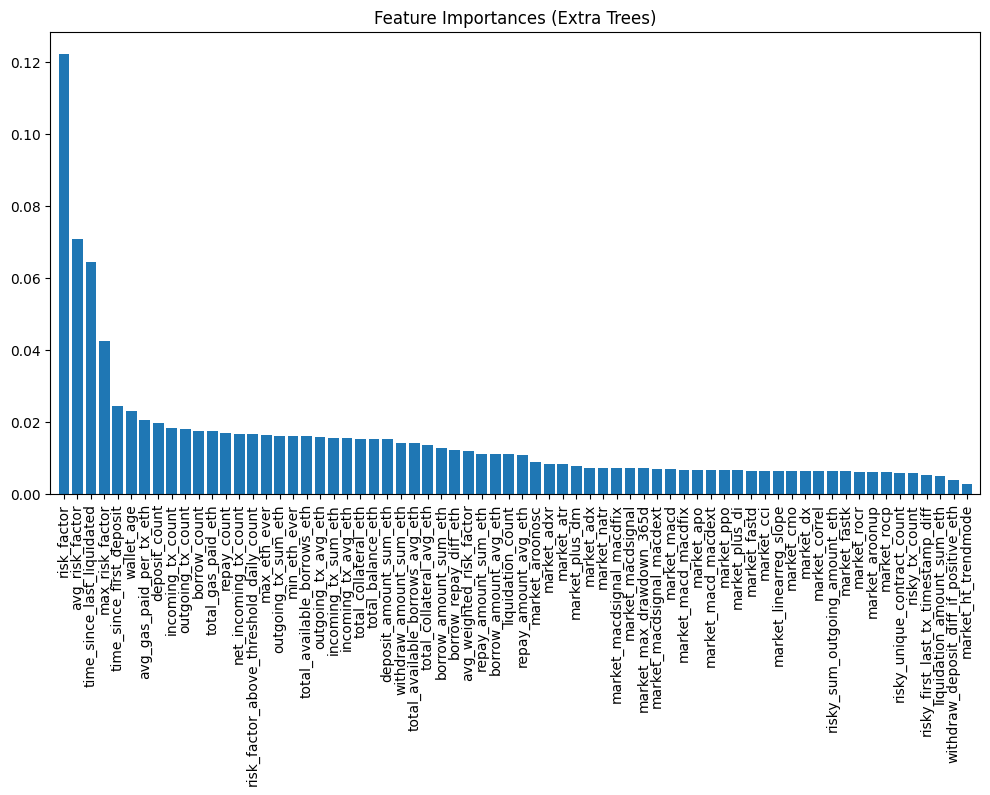

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_pipe = train_model(
    model=ExtraTreesClassifier(n_estimators=100, random_state=42),
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    experiment_name="Extra Trees: n_estimators=100, random_state=42",
    numeric_features=train_numeric_features,
    categorical_features=categorical_features,
)
et_model = extra_tree_pipe.named_steps["classifier"]
importances = et_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Extra Trees)")
preprocessed_X_train = extra_tree_pipe.named_steps["preprocessor"].transform(X_train)

plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

# Entrega Etapa 2 Laboratorio de Programación Ciéntifica

A continuación se realiza la optimización del mejor modelo encontrado en la primera entrega del proyecto, para ello se optimizará los hiperparámetros del modelo y de los preprocesadores utilizados.

## Optimización de modelos

Se utilizará `Optuna` para la búsqueda de hiperparámetros y también se probarán técnicas de selección de atributos.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
#primero veamoslo para Random Forest
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
selector = SelectFromModel(estimator=clf, max_features=30)

X4_train = selector.fit_transform(X_train, y_train)
X4_test = selector.transform(X_test)

## Re-entrenamiento del modelo

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Primero el entrenamiento normal
model_final = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
extra_tree_pipe_retrain, model_et_retrain = train_model(
    model=model_final,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    experiment_name="Modelo Incremental",
    numeric_features=train_numeric_features,
    categorical_features=categorical_features,
    save_model_path="extra_tree_model_pre_retrain.pkl",
)

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

Evaluación del modelo en el conjunto de entrenamiento:
Métricas del modelo:
    accuracy: 0.9512368174928242
    precision: 0.9786481617401748
    recall: 0.9248376316287281
    f1_score: 0.9509822991635869
    roc_auc: 0.9916981588457949
Confusion matrix:
[[14828   320]
 [ 1192 14667]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     15148
           1       0.98      0.92      0.95     15859

    accuracy                           0.95     31007
   macro avg       0.95      0.95      0.95     31007
weighted avg       0.95      0.95      0.95     31007

Evaluación del modelo en el conjunto de validación:
Métricas del modelo:
    accuracy: 0.885009030704395
    precision: 0.9146725440806045
    recall: 0.8549146556798116
    f1_score: 0.8837846060237299
    roc_auc: 0.9515175013245804
Confusion matrix:
[[2975  271]
 [ 493 2905]]
Classification report:
              precision    recall  f1-score   support

    

In [40]:
X_t1_iter_1 = pd.read_parquet(DATA_PATH + "X_t1_new.parquet").reset_index(drop=True)
y_t1_iter_1 = pd.read_parquet(DATA_PATH + "y_t1.parquet").reset_index(drop=True)

df_t1_iter_1 = pd.concat([X_t1_iter_1, y_t1_iter_1], axis=1)

df_t1_iter_1_columns_dropped = df_t1_iter_1.drop(columns=columns_to_drop, inplace=False)

X_t1_iter_1 = df_t1_iter_1_columns_dropped.drop(columns='target')
y_t1_iter_1 = df_t1_iter_1_columns_dropped['target']

X_t1_iter_1.head()

,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,...,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr
0,41337993.0,12,14,-2,0.015177,0.001084,1,2,0,17.560335,...,1.459793,3.971377,4.14544,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
1,27637657.0,189,217,-28,1.162723,0.005358,13,3,521720,113.787495,...,1.459793,3.971377,4.14544,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
2,96789742.0,27,32,-5,0.270085,0.008440,3,1,18937,170.000000,...,1.459793,3.971377,4.14544,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
3,29496551.0,171,228,-57,0.206756,0.000911,0,0,0,0.000000,...,1.459793,3.971377,4.14544,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
4,1339.0,4,3,1,0.010250,0.003417,0,0,0,0.000000,...,1.459793,3.971377,4.14544,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081


In [47]:
def function_to_retrain_XGB(model, X_train, y_train):
    import xgboost as xgb
    # We use save_model function of xgboost to save the model
    model.save_model("tmp_model.model")
    # We use the train method of xgboost to update the model
    xgb.train(
        model.get_params(),
        xgb.DMatrix(X_train, label=y_train),
        num_boost_round=10,
        xgb_model="tmp_model.model",
    )
    # Remove the temporary model
    os.remove("tmp_model.model")
    return model

In [48]:
retrained_pipe, retrained_model = retrain_model(
    pipeline_or_path="extra_tree_model_pre_retrain.pkl",
    X=X_t1_iter_1,
    y=y_t1_iter_1,
    fun_to_update_model=function_to_retrain_XGB,
    save_model_path="extra_tree_model_post_retrain.pkl",
    test_size=0.2,
    random_state=42,
    optimize=True,
    get_optuna_params=lambda trial: {
        "max_depth": trial.suggest_int("max_depth", 1, 32),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 32),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
    },
    n_trials=5,
)

Traceback (most recent call last):
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\python-envs\nb-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^

Evaluación en el conjunto de prueba:
Métricas del modelo:
    accuracy: 0.8749341560689292
    precision: 0.9085659287776708
    recall: 0.7465401344404903
    f1_score: 0.8196223138701976
    roc_auc: 0.9397973274323521
Confusion matrix:
[[15702   760]
 [ 2564  7552]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16462
           1       0.91      0.75      0.82     10116

    accuracy                           0.87     26578
   macro avg       0.88      0.85      0.86     26578
weighted avg       0.88      0.87      0.87     26578



## Tracking de experimentos con MLflow

Para visualizar la interfaz gráfica con el progreso de los experimentos, se debe ejecutar la siguiente celda que corre el comando `mlflow ui` en el directorio actual, y luego abrir el navegador en la dirección: `localhost:5000`.

In [ ]:
!mlflow ui

^C
